## Function Definitions

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns

In [3]:
projectData = pd.read_csv("testDataAnalysis.csv")

In [4]:
projectData.head()

,player_id,player_name.x,SALARY,fantasy_points,Pos,Age,Tm,G,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,salaryPerPoints,predResponse
0,adamsst01,Steven Adams,3140517.0,1800.6,C,23,OKC,80,80,2389,...,332,613,86,89,78,146,195,905,1744.150283,5638.232313
1,aldrila01,LaMarcus Aldridge,20575005.0,2029.1,PF,31,SAS,72,72,2335,...,351,523,139,46,88,98,158,1243,10139.965995,9581.349370
2,aminual01,Al-Farouq Aminu,7680965.0,1239.7,PF,26,POR,61,25,1773,...,374,451,99,60,44,94,102,532,6195.825603,10914.458213
3,anderky01,Kyle Anderson,1192080.0,702.1,SF,23,SAS,72,14,1020,...,175,208,91,51,26,39,63,246,1697.877795,2037.547889
4,anderry01,Ryan Anderson,18735364.0,1383.0,PF,28,HOU,72,72,2116,...,218,330,68,31,14,55,142,979,13546.900940,9327.724856


In [5]:
def isPlayerPosition(data, pos):
    position = None
    if data == pos:
        return 1
    else:
        return 0

In [6]:
def computeIdealLineup(data, rosterSize, numPG, numSG, numSF, numPF, numC, salary):
    # Greedy Selection, choose top players where criteria is set, then fill in surrounding cast
    data = data.sort_values("predResponse", axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')
    data = data.reset_index(drop=True)
    pg, sg, sf, pf, c = 0,0,0,0,0
    availset = ["PG", "SG", "SF", "PF", "C"]
    
    playernames = []
    positions = []
    points = []
    salaries = []
    totalfantasypoints = 0
    
    # Build with restrictions
    for i in range(len(data)):
        if data.loc[i, "SALARY"] < salary and data.loc[i, "Pos"] in availset:
            # Add player to set
            playernames.append(data.loc[i, "player_name.x"])
            positions.append(data.loc[i, "Pos"])
            points.append(data.loc[i, "predResponse"])
            salaries.append(data.loc[i, "SALARY"])
            pg += isPlayerPosition(data.loc[i, "Pos"], "PG")
            sg += isPlayerPosition(data.loc[i, "Pos"], "SG")
            sf += isPlayerPosition(data.loc[i, "Pos"], "SF")
            pf += isPlayerPosition(data.loc[i, "Pos"], "PF")
            c  += isPlayerPosition(data.loc[i, "Pos"], "C")
            salary -= data.loc[i, "SALARY"]
        if pg >= numPG and "PG" in availset:
                availset.remove("PG")
        if sg >= numSG and "SG" in availset:
                availset.remove("SG")
        if sf >= numSF and "SF" in availset:
                availset.remove("SF")
        if pf >= numPF and "PF" in availset:
                availset.remove("PF")
        if c >= numC and "C" in availset:
                availset.remove("C")
        if len(availset) == 0:
            break
    
    numremaining = rosterSize - numPG - numSG - numSF - numPF - numC
    
    # Fill Rest of Roster
    for i in range(len(data)):
        if data.loc[i, "SALARY"] < salary and numremaining > 0 and data.loc[i, "player_name.x"] not in playernames:
            # Add player to set
            playernames.append(data.loc[i, "player_name.x"])
            positions.append(data.loc[i, "Pos"])
            points.append(data.loc[i, "predResponse"])
            salaries.append(data.loc[i, "SALARY"])
            salary -= data.loc[i, "SALARY"]
            numremaining -= 1
        elif numremaining == 0:
            break
    
    
    d = {'Name': playernames, 'position': positions, 'points': points, 'salary': salaries}
    df = pd.DataFrame(data=d)
    
    return df

In [9]:
finalLineup = computeIdealLineup(projectData, 15, 2, 2, 2, 2, 2, 109140000)

## Selection

In [10]:
finalLineup

,Name,position,points,salary
0,Jerami Grant,PF,91443.323195,980431.0
1,Cameron Payne,PG,70952.139279,2112480.0
2,Demetrius Jackson,PG,66514.885565,1450000.0
3,Andrew Nicholson,PF,47730.719994,6088993.0
4,Udonis Haslem,C,37593.271580,4000000.0
5,Kyle Korver,SG,33378.861776,5239437.0
6,Lou Williams,SG,29274.734671,7000000.0
7,Doug McDermott,SF,25508.515396,2483040.0
8,Rudy Gay,SF,25364.740475,13333333.0
9,Mason Plumlee,C,23172.840089,2328530.0


Text(0.5, 1.0, 'Average Points Per Position')

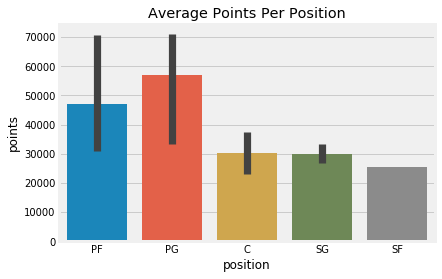

In [18]:
sns.barplot(x="position", y="points", data=finalLineup)
plt.title("Average Points Per Position")

Text(0.5, 1.0, 'Salary Per Position')

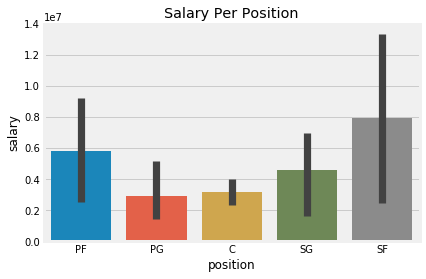

In [12]:
sns.barplot(x="position", y="salary", data=finalLineup)
plt.title("Salary Per Position")

(0, 40000000)

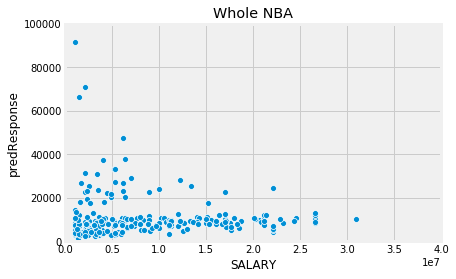

In [13]:
# Total Data Spread
sns.scatterplot(x="SALARY", y="predResponse", data=projectData)
plt.title("Whole NBA")
plt.ylim(0, 100000)
plt.xlim(0, 40000000)

(0, 40000000)

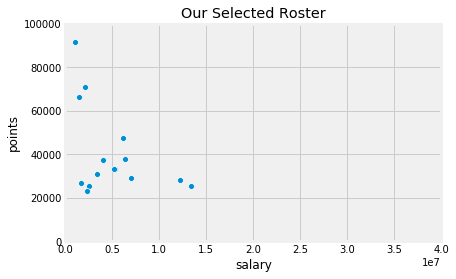

In [14]:
# Our Selected Players
sns.scatterplot(x="salary", y="points", data=finalLineup)
plt.title("Our Selected Roster")
plt.ylim(0, 100000)
plt.xlim(0, 40000000)

## Point Generation

In [15]:
print("Total Points: ", sum(finalLineup["salary"]))

Total Points:  73775657.0


In [16]:
teampoints = projectData.groupby("Tm").sum()
teampoints = teampoints[["predResponse", "salaryPerPoints"]]
teampoints

,predResponse,salaryPerPoints
Tm,,
ATL,111190.911029,82161.714628
BOS,141306.485322,128697.751812
BRK,75550.512810,105940.332333
CHI,135170.034316,68110.564707
CHO,79454.619744,59398.011801
CLE,75108.551060,56145.359769
DAL,42660.434652,38472.442693
DEN,94253.275057,44579.440924
DET,68522.255274,55679.758438


In [17]:
print("Best NBA Team's Total Points: ", int(max(teampoints["predResponse"])))
print("Our Selected Team's Total Points: ", int(sum(finalLineup["points"])))

print("Total Salary Expended:", sum(finalLineup["salary"]))

Best NBA Team's Total Points:  146445
Our Selected Team's Total Points:  607680
Total Salary Expended: 73775657.0


In [24]:
print("Mean PredResponse", np.mean(projectData["predResponse"]))
print("Our PredResponse", np.mean(finalLineup["points"]))

print("Mean Points/$ Spent", np.mean(projectData["salaryPerPoints"]))
print("Mean Points/$ Spent", np.mean(finalLineup["salary"]/ finalLineup["points"]))


Mean PredResponse 10801.659450539037
Our PredResponse 40512.01858813535
Mean Points/$ Spent 8748.92651031055
Mean Points/$ Spent 156.35294307676944
